# Data about cat

In the following API there is 67 breeds of cat(https://api.thecatapi.com/v1/breeds). Let's learn more about cat using Python.


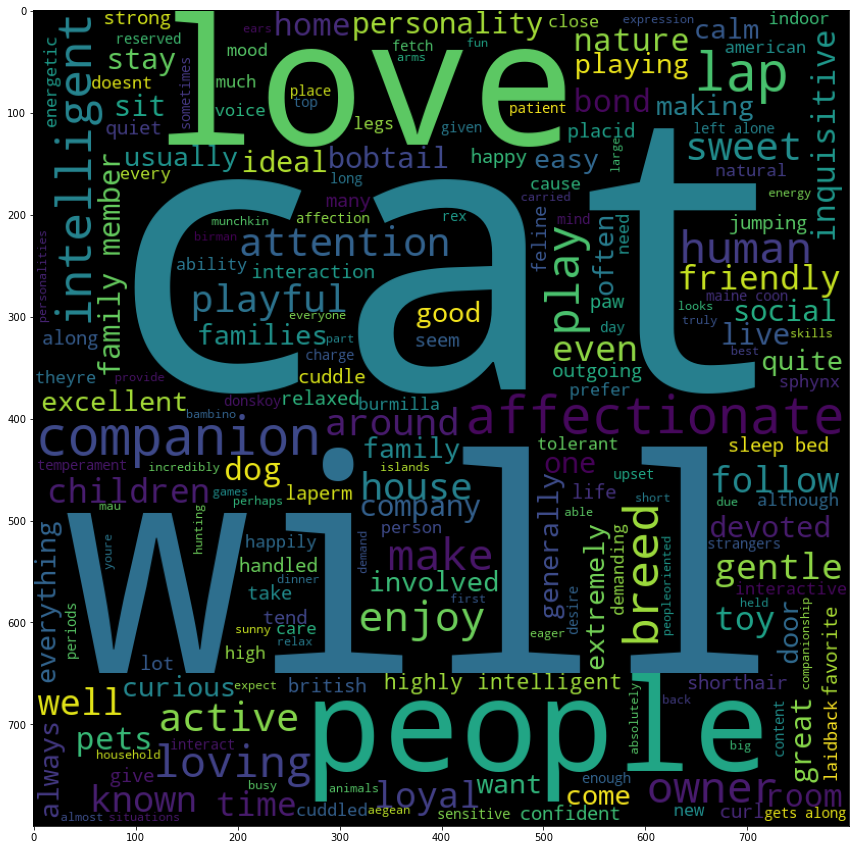

In [65]:
import requests
from collections import Counter
import re
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from pprint import pprint

def load_data(url):
    response = requests.get(url)
    return response.json()

def clean_text(txt):
    pattern = r'[^a-zA-Z ]'
    return re.sub(pattern, '', txt)
words = []
data = load_data('https://api.thecatapi.com/v1/breeds')
for cat in data:
    description = clean_text(cat['description']).lower()
    words.extend(description.split())
    
words = [word for word in words if word not in STOPWORDS]
text = ' '.join(words)

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = STOPWORDS).generate(text)


# plot the WordCloud image                      
plt.figure(figsize = (15, 15), facecolor = None)
plt.imshow(wordcloud)
# plt.axis("off")
# plt.tight_layout(pad = 0)
 
plt.show()
